In [92]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
import xgboost as xgb
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression

In [93]:
data=pd.read_csv('song_data.csv') 

In [94]:
data.head()

,song_name,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
0,Boulevard of Broken Dreams,73,262333,0.005520,0.496,0.682,0.000029,8,0.0589,-4.095,1,0.0294,167.060,4,0.474
1,In The End,66,216933,0.010300,0.542,0.853,0.000000,3,0.1080,-6.407,0,0.0498,105.256,4,0.370
2,Seven Nation Army,76,231733,0.008170,0.737,0.463,0.447000,0,0.2550,-7.828,1,0.0792,123.881,4,0.324
3,By The Way,74,216933,0.026400,0.451,0.970,0.003550,0,0.1020,-4.938,1,0.1070,122.444,4,0.198
4,How You Remind Me,56,223826,0.000954,0.447,0.766,0.000000,10,0.1130,-5.065,1,0.0313,172.011,4,0.574


In [95]:
data.shape

(18835, 15)

In [96]:
len(data['song_name'].unique())

13070

##Checking the missing values

In [97]:
data.isnull().sum()

song_name           0
song_popularity     0
song_duration_ms    0
acousticness        0
danceability        0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
audio_mode          0
speechiness         0
tempo               0
time_signature      0
audio_valence       0
dtype: int64

##Checking the attributes that are categorical

In [98]:
data.dtypes=='object'

song_name            True
song_popularity     False
song_duration_ms    False
acousticness        False
danceability        False
energy              False
instrumentalness    False
key                 False
liveness            False
loudness            False
audio_mode          False
speechiness         False
tempo               False
time_signature      False
audio_valence       False
dtype: bool

##The song names are label encoded

In [99]:
le=LabelEncoder()

In [100]:
data['song_name']=le.fit_transform(data['song_name'])

In [101]:
data.head()

,song_name,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
0,1561,73,262333,0.005520,0.496,0.682,0.000029,8,0.0589,-4.095,1,0.0294,167.060,4,0.474
1,5541,66,216933,0.010300,0.542,0.853,0.000000,3,0.1080,-6.407,0,0.0498,105.256,4,0.370
2,9638,76,231733,0.008170,0.737,0.463,0.447000,0,0.2550,-7.828,1,0.0792,123.881,4,0.324
3,1760,74,216933,0.026400,0.451,0.970,0.003550,0,0.1020,-4.938,1,0.1070,122.444,4,0.198
4,4988,56,223826,0.000954,0.447,0.766,0.000000,10,0.1130,-5.065,1,0.0313,172.011,4,0.574


In [102]:

len(data['song_name'].unique())

13070

##MinMaxScaling is applied

In [103]:
mx=MinMaxScaler()

In [104]:
data_norm=pd.DataFrame(mx.fit_transform(data))

In [105]:
data_norm.columns=data.columns

In [106]:

data_norm.head()

,song_name,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
0,0.119443,0.73,0.140059,0.005541,0.502533,0.682342,0.000029,0.727273,0.049226,0.859242,1.0,0.031243,0.689425,0.8,0.481707
1,0.423980,0.66,0.114658,0.010340,0.549139,0.853697,0.000000,0.272727,0.099580,0.801948,0.0,0.052922,0.434371,0.8,0.376016
2,0.737470,0.76,0.122938,0.008202,0.746707,0.462888,0.448345,0.000000,0.250333,0.766734,1.0,0.084166,0.511233,0.8,0.329268
3,0.134670,0.74,0.114658,0.026505,0.456940,0.970940,0.003561,0.000000,0.093426,0.838352,1.0,0.113709,0.505303,0.8,0.201220
4,0.381667,0.56,0.118514,0.000957,0.452888,0.766517,0.000000,0.909091,0.104707,0.835204,1.0,0.033262,0.709856,0.8,0.583333


##The correlation is checked

In [107]:

data_norm.corr()

,song_name,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
song_name,1.000000,0.009364,-0.013220,0.037685,-0.009806,-0.036023,0.006865,-0.000781,-0.009853,-0.021601,0.006987,-0.010301,-0.001841,-0.011529,-0.010750
song_popularity,0.009364,1.000000,-0.018899,-0.065181,0.104290,0.001365,-0.130907,-0.013160,-0.038937,0.099442,-0.004969,0.021479,-0.022672,0.034983,-0.052895
song_duration_ms,-0.013220,-0.018899,1.000000,-0.097882,-0.104985,0.092688,-0.015188,-0.004615,0.016086,0.016469,-0.026328,-0.083447,0.012791,0.000264,-0.063421
acousticness,0.037685,-0.065181,-0.097882,1.000000,-0.182500,-0.662639,0.173098,-0.002025,-0.082537,-0.557744,0.064100,-0.093574,-0.136421,-0.157177,-0.121670
danceability,-0.009806,0.104290,-0.104985,-0.182500,1.000000,0.044373,-0.130483,0.007723,-0.090694,0.177639,-0.106539,0.213728,-0.121286,0.136391,0.332014
energy,-0.036023,0.001365,0.092688,-0.662639,0.044373,1.000000,-0.205914,0.020416,0.167143,0.755516,-0.051605,0.062053,0.162448,0.146265,0.316742
instrumentalness,0.006865,-0.130907,-0.015188,0.173098,-0.130483,-0.205914,1.000000,-0.009463,-0.032887,-0.390248,-0.014983,-0.081138,-0.036934,-0.069181,-0.178570
key,-0.000781,-0.013160,-0.004615,-0.002025,0.007723,0.020416,-0.009463,1.000000,-0.008193,0.010452,-0.169848,0.033639,0.003239,-0.008282,0.025356
liveness,-0.009853,-0.038937,0.016086,-0.082537,-0.090694,0.167143,-0.032887,-0.008193,1.000000,0.102450,-0.001035,0.090845,0.031876,0.013289,0.013789
loudness,-0.021601,0.099442,0.016469,-0.557744,0.177639,0.755516,-0.390248,0.010452,0.102450,1.000000,-0.058506,0.078164,0.129938,0.119241,0.199696


<Axes: >

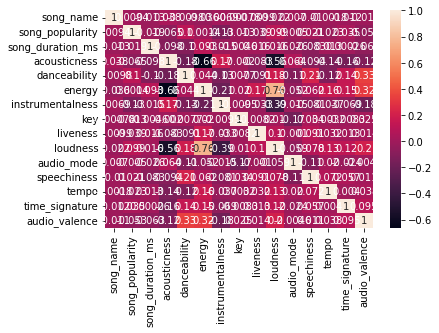

In [108]:
sns.heatmap(data_norm.corr(),annot=True)

##Correlation between the features 'energy' and 'loudness'

<Axes: xlabel='energy', ylabel='loudness'>

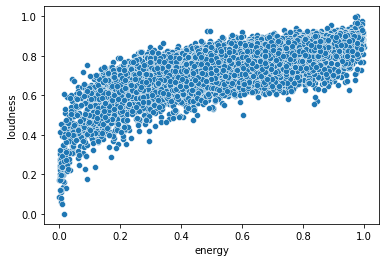

In [109]:
sns.scatterplot(data=data_norm, x="energy", y="loudness")

##Dropping the energy column

In [110]:
data=data_norm.drop('energy',axis=1)

##Checking the outliers

In [111]:
def find_outliers_IQR(df):

   q1=df.quantile(0.25)

   q3=df.quantile(0.75)

   IQR=q3-q1

   outliers = df[((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))]

   return outliers

In [112]:
outliers = find_outliers_IQR(data['song_popularity'])

In [113]:
outliers

Series([], Name: song_popularity, dtype: float64)

We can see that there are no outliers

<Axes: xlabel='song_popularity'>

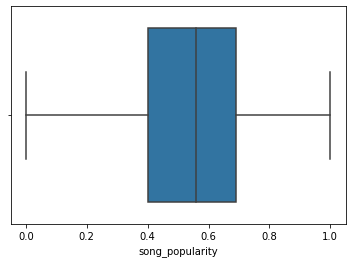

In [114]:
sns.boxplot(x=data['song_popularity'])

In [115]:
data['song_popularity']

0        0.73
1        0.66
2        0.76
3        0.74
4        0.56
         ... 
18830    0.60
18831    0.60
18832    0.23
18833    0.55
18834    0.60
Name: song_popularity, Length: 18835, dtype: float64

In [116]:
def func(x):
    if 0 < x <= 0.65:
        return 0
    else:
        return 1

In [117]:
data['song_popularity'] = data['song_popularity'].apply(func)

In [118]:
Y=data['song_popularity']

In [119]:
X=data.drop('song_popularity',axis=1)

In [120]:
Y

0        1
1        1
2        1
3        1
4        0
        ..
18830    0
18831    0
18832    0
18833    0
18834    0
Name: song_popularity, Length: 18835, dtype: int64

In [121]:
data['song_popularity'].value_counts().sort_index()

0    12761
1     6074
Name: song_popularity, dtype: int64

##Splitting train and test data

In [122]:
X_train,X_test,Y_train,Y_test=train_test_split(X, Y,test_size=0.2, random_state=4)

In [123]:
X_train.shape

(15068, 13)

In [124]:
X_test.shape

(3767, 13)

In [125]:
Y_train

616      0
18748    0
11498    0
14361    0
13411    1
        ..
16840    0
11863    0
17093    1
8366     0
17530    0
Name: song_popularity, Length: 15068, dtype: int64

In [126]:
lr = LogisticRegression()
lr.fit(X_train, Y_train)
y_pred = lr.predict(X_test)

In [127]:
from sklearn.metrics import accuracy_score
print('Accuracy : ',accuracy_score(Y_test,y_pred))

Accuracy :  0.6740111494558003


In [128]:
xgb_reg = xgb.XGBClassifier()
xgb_reg.fit(X_train, Y_train)
y_pred = xgb_reg.predict(X_test)

In [129]:
print('Accuracy : ',accuracy_score(Y_test,y_pred))

Accuracy :  0.7966551632598885


In [130]:
y_pred

array([0, 1, 0, ..., 0, 0, 0])

In [131]:
Y_test

4079     0
3442     0
17909    0
4951     0
6701     0
        ..
1521     1
8569     0
13434    0
15258    0
8474     0
Name: song_popularity, Length: 3767, dtype: int64

In [132]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.3]
}

In [134]:
grid_search = GridSearchCV(estimator=xgb_reg, param_grid=param_grid, cv=5, scoring='roc_auc')
grid_search.fit(X_train, Y_train)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, ...),
             param_grid={'learning_rate': [0.01, 0.1, 0.3],
                         'max_depth': [3, 5, 7],
                         'n_estimators': [50, 100, 200]},
             scoring='roc_auc')

In [136]:
print('Best hyperparameters:', grid_search.best_params_)
print('Best score:', grid_search.best_score_)
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

Best hyperparameters: {'learning_rate': 0.3, 'max_depth': 7, 'n_estimators': 200}
Best score: 0.822063636152422


In [140]:
xgb_reg = xgb.XGBClassifier(learning_rate=0.3,max_depth=7,n_estimators=200)

In [145]:
params = {
    'subsample': [0.7, 0.8, 0.9],
    'colsample_bytree': [0.7, 0.8, 0.9],
    'gamma': [0, 1, 5],
    
}

In [146]:
print('Accuracy:', accuracy_score(Y_test, y_pred))

Accuracy: 0.8205468542606849


In [147]:
grid_search = GridSearchCV(estimator=xgb_reg, param_grid=params, cv=5, scoring='roc_auc')
grid_search.fit(X_train, Y_train)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=0.3, m...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=7,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=200, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, ...),
             param_grid={'colsample_bytree': [0.7, 0.8, 0.9],
                         'gamma': [0, 1, 5], 'subsample': [0.7, 0.8, 0.9]},
             scoring='roc_auc')

In [148]:
print('Best hyperparameters:', grid_search.best_params_)
print('Best score:', grid_search.best_score_)
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

Best hyperparameters: {'colsample_bytree': 0.8, 'gamma': 0, 'subsample': 0.9}
Best score: 0.8227654667717565


In [150]:
print('Accuracy:', accuracy_score(Y_test, y_pred))

Accuracy: 0.8282452880276082


In [151]:
from sklearn import tree

In [152]:
clf = tree.DecisionTreeClassifier()

In [153]:
clf.fit(X_train, Y_train)

DecisionTreeClassifier()

In [154]:
y_pred = clf.predict(X_test)

In [155]:
print('Accuracy:', accuracy_score(Y_test, y_pred))

Accuracy: 0.7655959649588532


In [156]:
from sklearn.ensemble import RandomForestClassifier

In [165]:
clf = RandomForestClassifier()

In [166]:
clf.fit(X_train, Y_train)

RandomForestClassifier()

In [167]:
y_pred = clf.predict(X_test)

In [168]:
print('Accuracy:', accuracy_score(Y_test, y_pred))

Accuracy: 0.8539952216617999


In [169]:
import pickle

In [170]:
filename = 'finalized_model.sav'
pickle.dump(clf, open(filename, 'wb'))
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X_test, Y_test)
print(result)

0.8539952216617999


In [173]:
y_pred = loaded_model.predict(X_test)

In [174]:
print('Accuracy:', accuracy_score(Y_test, y_pred))

Accuracy: 0.8539952216617999


In [182]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve

##Confusion matrix

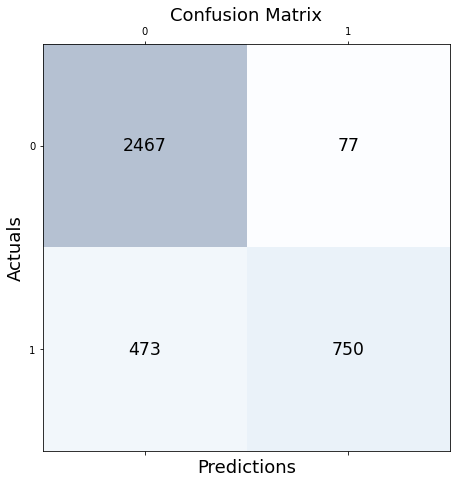

In [177]:
conf_matrix = confusion_matrix(y_true=Y_test, y_pred=y_pred)
#
# Print the confusion matrix using Matplotlib
#
fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

##Roc Curve

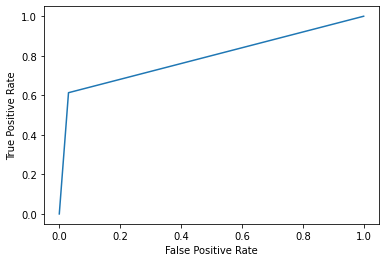

In [179]:
fpr, tpr, _ = roc_curve(Y_test,  y_pred)

#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [184]:
from sklearn.metrics import roc_auc_score

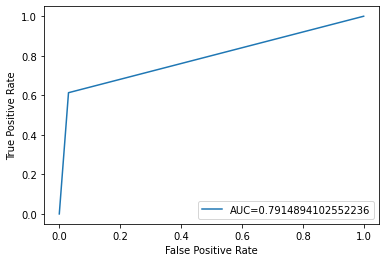

In [185]:
auc = roc_auc_score(Y_test, y_pred)

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()